In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [221]:
def train_perceptron(x_inp : np.array, yi : np.array, learn_rate : float, tol : float, max_epochs : int, control_var : bool):
    dim = list(x_inp.shape)
    try : # Caso eu tenha algum problema com as colunas do meu programa...
        n_rows = dim[0]
        n_cols = dim[1]
    except Exception as error:
        if error == "IndexError":
            print("Now, you don't have cols, so we will change it...\n")
            n_cols = 1
        else:
            print(f"The error {error} is hapenning \n")
            print("Breaking the program...")
            sys.exit()
    finally:
        if control_var == True:
            w = np.random.uniform(size = n_cols + 1) - 0.5
            x_inp = np.column_stack([x_inp, np.ones_like(x_inp[:, 0])])
        else:
            w = np.random.uniform(size = n_cols) - 0.5
        n_epochs = 0
        lst_errors = np.zeros((max_epochs))
        err_epoch = tol + 1
        while((n_epochs < max_epochs) and (err_epoch > tol)):
            error_grad = 0
            changing_order = np.random.permutation(n_rows)
            for i in range(n_rows):
                i_rand = changing_order[i]
                x_train_val = x_inp[i_rand, :]
                y_hat = 1 if np.dot(x_train_val, w) >= 0 else 0
                err = (yi[i_rand] - y_hat)
                dw = (learn_rate*err*x_inp[i_rand, :])
                w = w + dw
                error_grad = error_grad + (err**2)
            lst_errors[n_epochs] = error_grad / n_rows 
            n_epochs += 1
        return (w, lst_errors)

In [222]:
def yperceptron(x_inp : np.array, w : np.array, control_var : bool):
    try : 
        n_rows = x_inp.shape[0]
        n_cols = x_inp.shape[1]
    except Exception as error:
        print(f"The error {error} is happening ...")
        n_cols = 1
        x_inp = x_inp.reshape(-1, 1)
    if control_var == True:
        x_inp = np.column_stack([x_inp, np.ones_like(x_inp[:, 0])])
    u = np.dot(x_inp, w)
    
    y = np.where(u >= 0, 1, 0) # Compara elemento a elemento com 0, retorna 1 caso maior e 0 caso menor.
    return y

In [223]:
xc1 = ((0.2*np.random.normal(size = 400) + 2).reshape(-1, 2))
xc2 = ((0.2*np.random.normal(size = 400) + 4).reshape(-1, 2))

[]

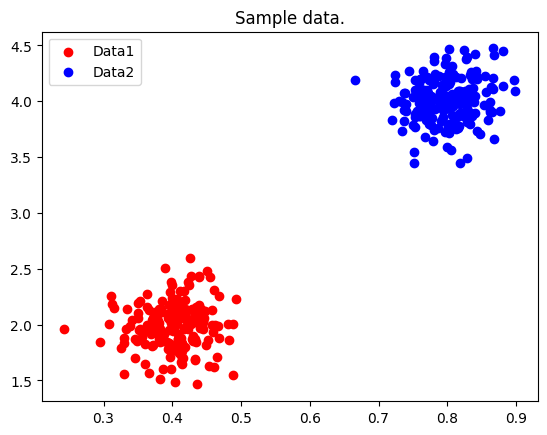

In [224]:
plt.scatter(0.2*xc1[:, 0],xc1[:, 1], color = 'red', label = 'Data1')
plt.scatter(0.2*xc2[:, 0],xc2[:, 1], color = 'blue', label = 'Data2')
plt.legend()
plt.title("Sample data.")
plt.plot()

##### Embaralhando os indices e alterando a ordem para melhorar o treinamento.

In [225]:
zeros = np.zeros((xc1.shape[0]))
ones = np.ones((xc2.shape[0]))
y_real = np.concatenate((zeros, ones), axis = 0)
xin = np.vstack([xc1, xc2])
indices = np.arange(xin.shape[0])
np.random.shuffle(indices)
xin = xin[indices]
y_real = y_real[indices]
xin

array([[3.75521742, 3.54177532],
       [3.91782277, 4.02976558],
       [3.90064025, 4.03139942],
       [2.07204013, 1.64316367],
       [1.88662295, 2.0542911 ],
       [4.06100488, 3.74867653],
       [1.99519926, 2.35458273],
       [1.95060297, 2.50723227],
       [4.24073431, 3.70165968],
       [2.23260254, 2.05422347],
       [2.0190849 , 1.98781747],
       [1.55723266, 2.25940653],
       [3.70278321, 3.97144873],
       [4.02432375, 3.56270887],
       [4.31119535, 3.89990249],
       [3.86136417, 4.04679984],
       [4.09035698, 3.44829931],
       [3.99684089, 3.99096544],
       [3.61779612, 4.23501471],
       [3.68205917, 3.91670808],
       [3.82255208, 3.99061488],
       [1.80322343, 1.65071446],
       [1.74392645, 1.85677241],
       [4.34033107, 4.4113186 ],
       [4.48531066, 4.19107382],
       [4.19234227, 3.98888972],
       [3.67146619, 3.99026426],
       [3.9608906 , 3.83123092],
       [4.00297844, 3.77918776],
       [1.76220946, 2.20685078],
       [2.

In [226]:
n_train = 280 # Serão 480 dados para teste.
x_train = xin[:n_train,]
y_train = y_real[:n_train]
x_test = xin[n_train:,]
y_test = y_real[n_train:]

In [227]:
retlist = train_perceptron(x_train, y_train, 0.01, 0.1, 1, True)
w = retlist[0]
w

array([-0.2234024 ,  0.28411184, -0.12459887])

In [228]:
yhat = yperceptron(x_test, w, True)

In [229]:
sum = 0
for (index, value) in enumerate(yhat):
    if value != y_test[index]:
        sum += 1
print(f"There are {sum} different values.")

There are 32 different values.


In [230]:
acuracy = 1 - (np.transpose(y_test - yhat) @ (y_test - yhat)) / 120
print(acuracy)

0.7333333333333334


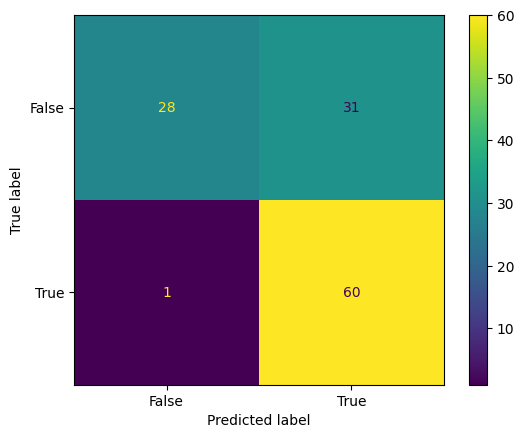

In [231]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, yhat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()